# IMPORTING LIBRARIES AND LOADING DATA


In [2]:
import numpy as np

In [3]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

In [5]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

# DATA VISUALISATION

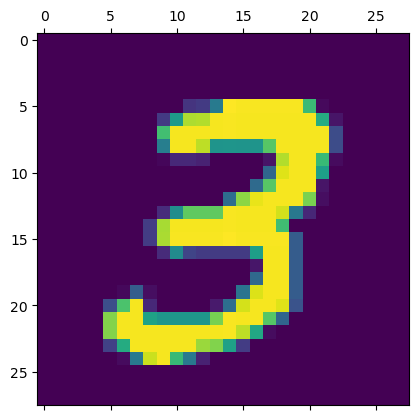

In [37]:
plt.matshow(x_train[7])

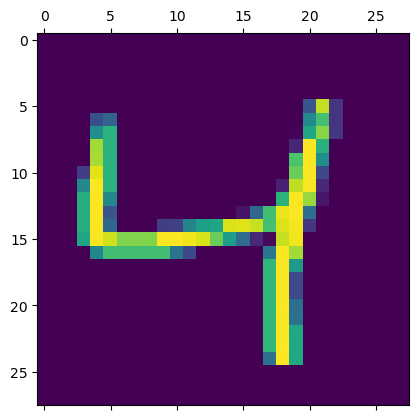

In [10]:
plt.matshow(x_train[2])

In [11]:
y_train[7]

3

In [12]:
y_train[:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

In [13]:
x_train.shape

(60000, 28, 28)

# DATA TRANSFORMATION

In [14]:
x_train_flattened =x_train.reshape(len(x_train),28*28)

In [15]:
x_train_flattened.shape

(60000, 784)

In [16]:
x_test_flattened =x_test.reshape(len(x_test),28*28)

In [17]:
x_test_flattened.shape

(10000, 784)

In [18]:
x_train_flattened=x_train_flattened/255
x_test_flattened=x_test_flattened/255

# DATA PREDICTION

In [19]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10,input_shape=(784,),activation="sigmoid"))          
          
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"]
             )
model.fit(x_train_flattened,y_train,epochs=7)

Epoch 1/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4692 - accuracy: 0.8779
Epoch 2/7
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3043 - accuracy: 0.9154
Epoch 3/7
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2838 - accuracy: 0.9202
Epoch 4/7
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2732 - accuracy: 0.9241
Epoch 5/7
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2668 - accuracy: 0.9258
Epoch 6/7
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2623 - accuracy: 0.9268
Epoch 7/7
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2586 - accuracy: 0.9285


In [20]:
model.evaluate(x_train_flattened,y_train)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2504 - accuracy: 0.9307


[0.25042346119880676, 0.9307166934013367]

In [21]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2665 - accuracy: 0.9246


[0.2664546072483063, 0.9246000051498413]

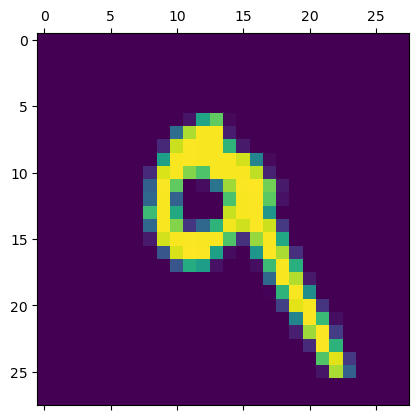

In [22]:
plt.matshow(x_test[7])

In [23]:
predict_y= model.predict(x_test_flattened)

313/313 [==============================] - 1s 1ms/step


In [24]:
predict_y[7]

array([5.8560136e-07, 3.0880991e-01, 5.9141433e-03, 2.4783215e-02,
       3.1455410e-01, 2.8467190e-01, 6.3039130e-04, 2.0188890e-02,
       8.7492660e-02, 9.7983199e-01], dtype=float32)

In [35]:
np.argmax(predict_y[5])

1

In [26]:
x_test_flattened[0].shape

(784,)

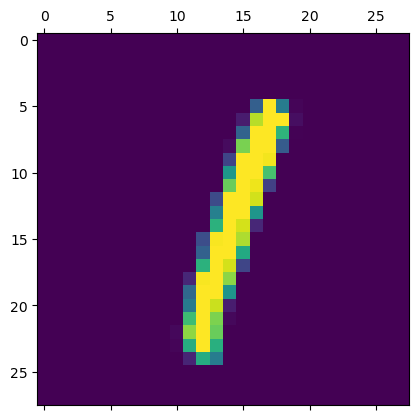

In [34]:
plt.matshow(x_test[5])

In [28]:
y_test[:9]

array([7, 2, 1, 0, 4, 1, 4, 9, 5], dtype=uint8)

In [29]:
y_predicted = [np.argmax(i) for i in predict_y]
y_predicted[:9]

[7, 2, 1, 0, 4, 1, 4, 9, 6]

In [30]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    0,    2,    0,    7,    7,    3,    5,    1],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   6,   11,  907,   25,    8,    5,   12,   13,   41,    4],
       [   3,    0,   10,  924,    1,   27,    2,   10,   25,    8],
       [   1,    1,    4,    2,  906,    0,   11,    4,   11,   42],
       [   7,    3,    2,   30,    9,  787,   14,    6,   29,    5],
       [  11,    3,    6,    2,    7,   14,  909,    2,    4,    0],
       [   1,    6,   19,    7,    6,    1,    0,  947,    4,   37],
       [   5,    8,    5,   19,    9,   26,    9,   10,  874,    9],
       [  10,    7,    1,    9,   20,    6,    0,   21,    8,  927]])>

In [31]:
import seaborn as sns

Text(95.72222222222221, 0.5, 'Truth')

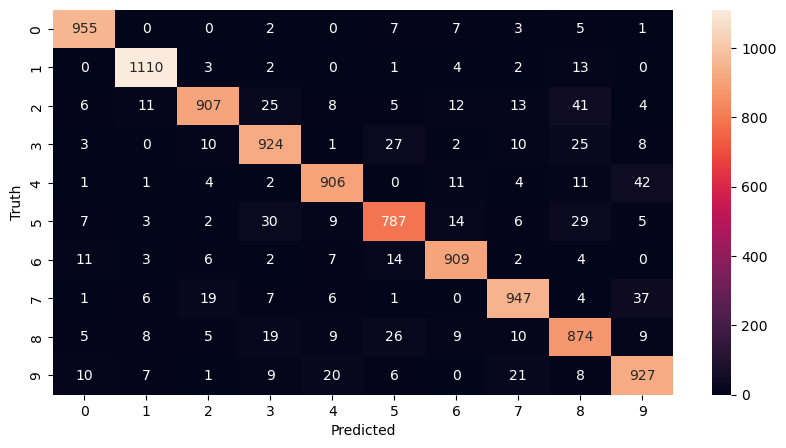

In [32]:
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

# UPGRADING DATA PREDICTION

In [33]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [36]:
 x_train_check=x_train_flattened.reshape(-1,28,28,1)
x_test_check=x_test_flattened.reshape(-1,28,28,1)

In [37]:
x_train_check.shape

(60000, 28, 28, 1)

In [38]:
x_test_check.shape

(10000, 28, 28, 1)

In [39]:
model = tf.keras.Sequential([
   keras.layers.Conv2D(16,3,padding="same",input_shape=(28,28,1),activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])
                  
          
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"]
             )
model.fit(x_train_check,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 28s 14ms/step - loss: 0.1497 - accuracy: 0.9533
Epoch 2/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0452 - accuracy: 0.9861
Epoch 3/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0334 - accuracy: 0.9896
Epoch 4/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0255 - accuracy: 0.9920
Epoch 5/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0200 - accuracy: 0.9933


In [40]:
model.evaluate(x_test_check,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0314 - accuracy: 0.9903


[0.03143271431326866, 0.9902999997138977]

In [41]:
#----------------------------------------END---------------------------------------------------#